In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [45]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#5): Which is digit '2'


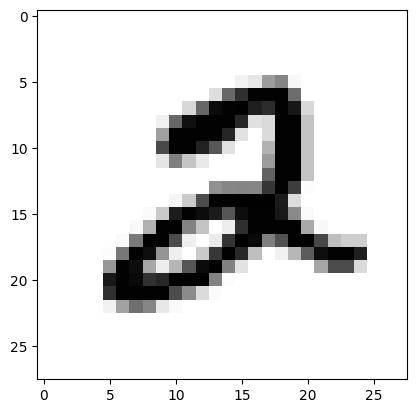

In [46]:
digit = 5 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

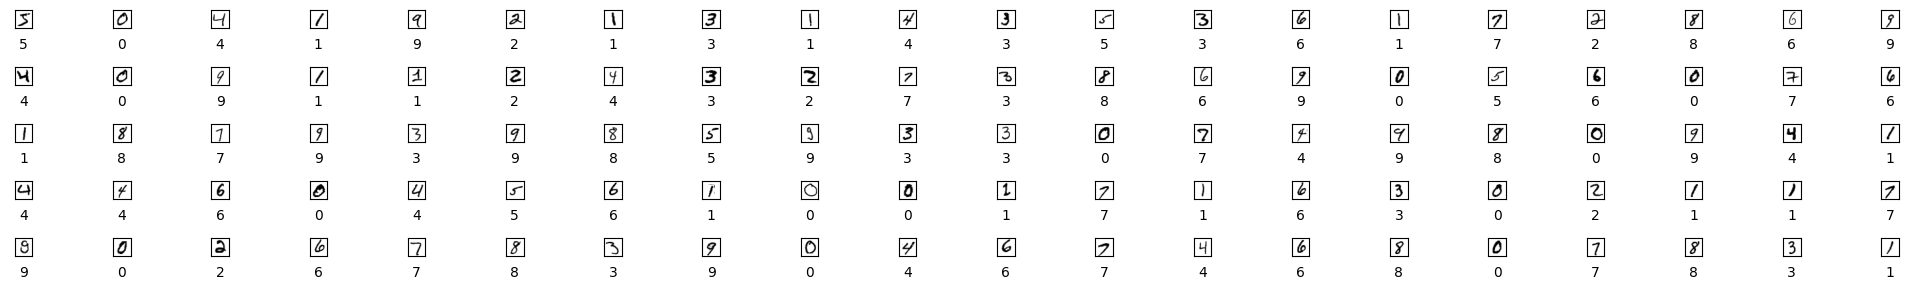

In [47]:
ROWS = 5
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [48]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

Image (#5): Which is digit '2'


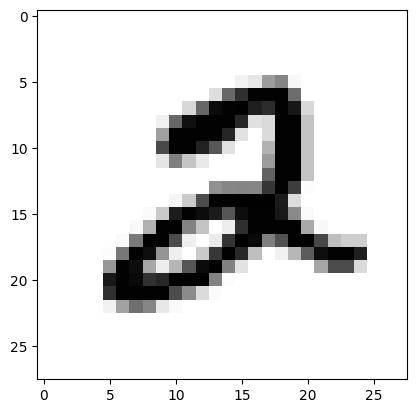

In [49]:
digit = 5 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [50]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [52]:
h2 = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 5s 7ms/step - loss: 0.2690 - accuracy: 0.9226 - val_loss: 0.1551 - val_accuracy: 0.9543
Epoch 2/5
657/657 [==============================] - 4s 7ms/step - loss: 0.1037 - accuracy: 0.9690 - val_loss: 0.1088 - val_accuracy: 0.9681
Epoch 3/5
657/657 [==============================] - 4s 6ms/step - loss: 0.0685 - accuracy: 0.9794 - val_loss: 0.1104 - val_accuracy: 0.9666
Epoch 4/5
657/657 [==============================] - 4s 6ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.1150 - val_accuracy: 0.9678
Epoch 5/5
657/657 [==============================] - 5s 7ms/step - loss: 0.0373 - accuracy: 0.9883 - val_loss: 0.1193 - val_accuracy: 0.9666


In [53]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [54]:
h1 = model.fit( x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 4s 6ms/step - loss: 0.0190 - accuracy: 0.9945 - val_loss: 0.0873 - val_accuracy: 0.9758
Epoch 2/5
657/657 [==============================] - 4s 5ms/step - loss: 0.0136 - accuracy: 0.9966 - val_loss: 0.0839 - val_accuracy: 0.9762
Epoch 3/5
657/657 [==============================] - 4s 6ms/step - loss: 0.0118 - accuracy: 0.9971 - val_loss: 0.0823 - val_accuracy: 0.9768
Epoch 4/5
657/657 [==============================] - 5s 7ms/step - loss: 0.0108 - accuracy: 0.9975 - val_loss: 0.0815 - val_accuracy: 0.9771
Epoch 5/5
657/657 [==============================] - 5s 7ms/step - loss: 0.0100 - accuracy: 0.9978 - val_loss: 0.0812 - val_accuracy: 0.9771


In [55]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [56]:
h3 = model.fit( x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 5s 6ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.1004 - val_accuracy: 0.9744
Epoch 2/5
657/657 [==============================] - 4s 7ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.1104 - val_accuracy: 0.9768
Epoch 3/5
657/657 [==============================] - 5s 8ms/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.1251 - val_accuracy: 0.9737
Epoch 4/5
657/657 [==============================] - 5s 8ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.1392 - val_accuracy: 0.9726
Epoch 5/5
657/657 [==============================] - 4s 6ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.1264 - val_accuracy: 0.9764


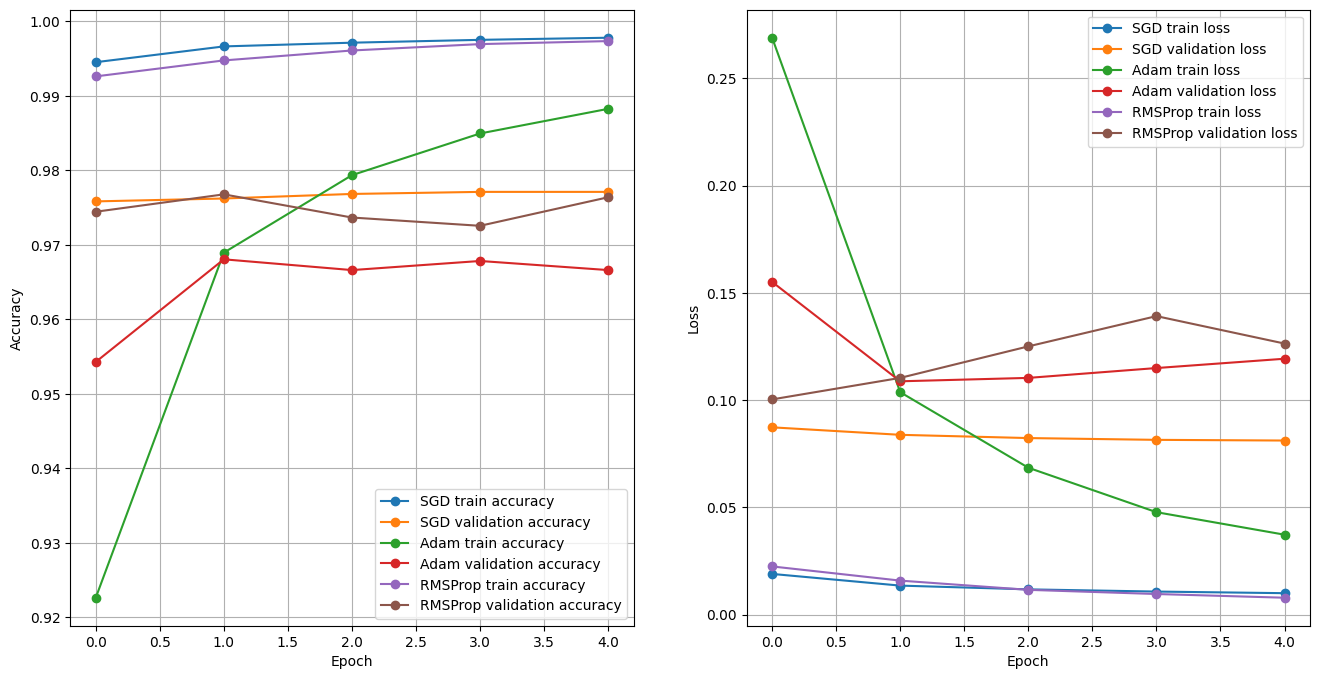

In [57]:
plt.figure(figsize=(16,8))

# Ploting accuracy
plt.subplot(1,2,1)
#for SGD
plt.plot(h1.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'SGD validation accuracy')

#for ADAM
plt.plot(h2.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'Adam validation accuracy')

#for RMSProp
plt.plot(h3.history['accuracy'], 'o-', label='RMSProp train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'RMSProp validation accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.grid(True)
plt.legend(loc='lower right')


# Ploting loss
plt.subplot(1,2,2)

#for SGD
plt.plot(h1.history['loss'], 'o-', label='SGD train loss')
plt.plot(h1.history['val_loss'], 'o-', label='SGD validation loss')

#for ADAM
plt.plot(h2.history['loss'], 'o-', label='Adam train loss')
plt.plot(h2.history['val_loss'], 'o-', label='Adam validation loss')

#for RMSProp
plt.plot(h3.history['loss'], 'o-', label='RMSProp train loss')
plt.plot(h3.history['val_loss'], 'o-', label='RMSProp validation loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.grid(True)
plt.legend(loc='upper right')


plt.show()